In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from freeplot.base import FreePlot

## lineplot

In [35]:
# preparation
titles = ("S", "h", "a", "n")
labels = ("sin", "cos", "x")
fp = FreePlot((1, 4), titles=titles, dpi=100, sharey=True) # shape: (1, 4)

<Figure size 1000x200 with 0 Axes>

In [36]:
# data
nums = 20
x = np.linspace(-10, 10, nums)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x
ys = (y1, y2, y3)

In [37]:
# plot
for title in titles:
    for i, y in enumerate(ys):
        y = y + np.random.randn(nums)
        fp.lineplot(x, y, index=title, label=labels[i])

In [38]:
# set properties
fp.set_title(y=1.)
fp.set_label("y", axis='y')
fp.set(xlabel="x")
fp[0, 0].legend()

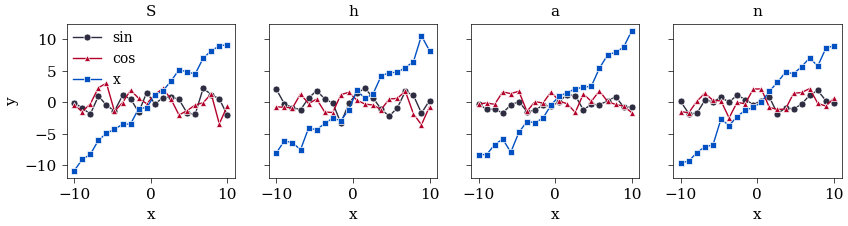

In [39]:
fp.fig

## stackplot

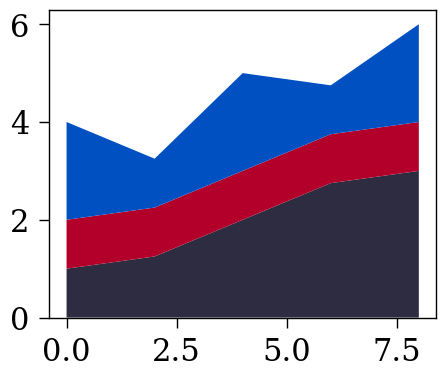

In [40]:
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])
fp = FreePlot()
fp.stackplot(x, y, index=(0, 0), style='stack')

In [41]:
fp = FreePlot((1, 1), titles=("Bar Demo",), dpi=200)

<Figure size 500x400 with 0 Axes>

## barplot

In [42]:

A = [1., 2., 3.]
B = [2., 3., 4.]
T = ['One', 'Two', 'Three'] * 2
Hue = ['A'] * len(A) + ['B'] * len(B)

# note that DataFrame required ...
data = pd.DataFrame(
    {
        "T": T,
        "val": A + B,
        "category": Hue
    }
)

In [43]:
fp.barplot(x='T', y='val', hue='category', data=data, index=(0, 0), auto_fmt=True)

([<BarContainer object of 3 artists>, <BarContainer object of 3 artists>],
 ['A', 'B'])

In [44]:
fp.set(xlabel='X')
fp.set_label('Y', index=(0, 0), axis='y')
fp[0, 0].legend(ncol=2)

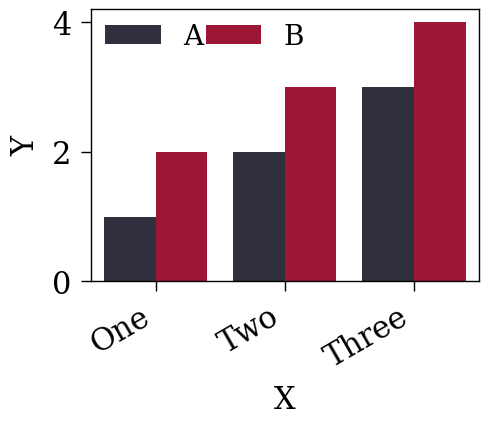

In [45]:
fp.fig

## scatterplot

In [46]:
from scipy.stats import multivariate_normal

In [47]:
normal = multivariate_normal
titles = ("S", "h", "a", "n")
labels = ("sin", "cos", "x")
fp = FreePlot((1, 4), titles=titles, dpi=100, sharey=True)

<Figure size 1000x200 with 0 Axes>

In [48]:
nums = 100
means = (
    (0, 0),
    (5, 5),
    (-5, -5)
)

cov = (
    2,
    1,
    1
)

In [49]:
for title in titles:
    for i, mean in enumerate(means):
        data = normal.rvs(mean, cov[i], size=nums)
        fp.scatterplot(data[:, 0], data[:, 1], index=title, label=labels[i])

In [50]:
fp.set_title(y=1.)
fp.set_label("Y", index=(0, 0), axis='y')
fp.set_label("X", index=None, axis='x')
fp[0, 0].legend()

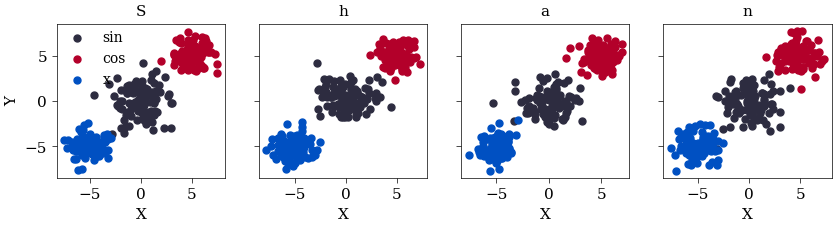

In [51]:
fp.fig

## heatmap

In [52]:
titles = ("S", "h", "a", "n")
row_labels = ('c', 'u', 't', 'e')
col_labels = ('l', 'r', 'i', 'g')
fp = FreePlot((1, 4), titles=titles, dpi=100, sharey=True)

<Figure size 1000x200 with 0 Axes>

In [53]:
for title in titles:
    data = np.random.rand(4, 4)
    df = pd.DataFrame(data, index=col_labels, columns=row_labels)
    fp.heatmap(df, index=title, annot=True, fmt=".4f", cbar=False, linewidth=0.5)

In [54]:
fp.set(xlabel="X")
fp.set_label('Y', index=(0, 0), axis='y')

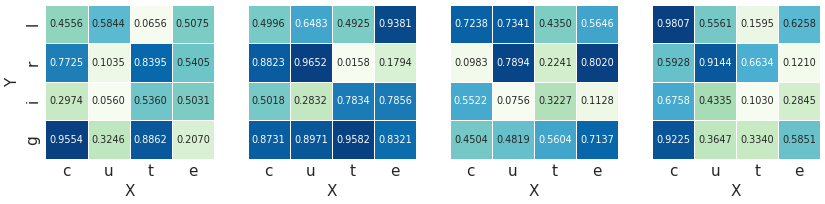

In [55]:
fp.fig

## radarplot

In [56]:
from freeplot.zoo import pre_radar, pos_radar

In [57]:
labels = (
    "brightness", "defocus_blur", "fog", "gaussian_blur", "glass_blur", "jpeg_compression",
    "motion_blur", "saturate, snow", "speckle_noise", "contrast", "elastic_transform", "frost",
    "gaussian_noise", "impulse_noise", "pixelate", "shot_noise", "spatter", "zoom_blur", "transform", "flowSong"
)
# use pre_radar to pre-define projection at first
theta = pre_radar(len(labels), frame="polygon")
fp = FreePlot((1, 1), (4, 4), dpi=100, titles=["RADAR"], projection="radar")
fp.set_style('no-latex')

<Figure size 400x400 with 0 Axes>

In [58]:
data = {
    "A": np.random.rand(len(labels)),
    'B': np.random.rand(len(labels)),
    'C': np.random.rand(len(labels))
}

In [59]:
pos_radar(data, labels, fp)

In [60]:
fp[0, 0].legend()

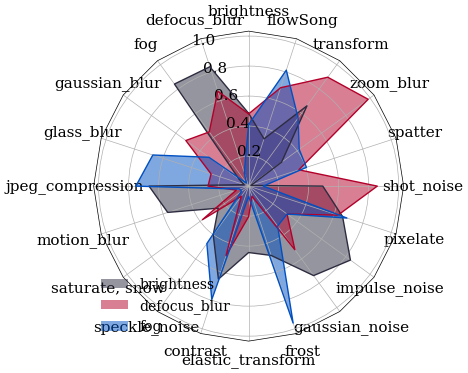

In [61]:
fp.fig

## violinplot

In [62]:
fp = FreePlot((1, 1), (5, 5))

<Figure size 1000x1000 with 0 Axes>

In [63]:
all_data = [np.random.normal(0, std, 100) for std in range(5, 10)]

In [64]:
fp.violinplot(x=['a', 'b', 'c', 'd', 'e'], y=all_data, index=(0, 0)) # if x is None, xticklabels will be set as 1, 2, 3 ...

{'bodies': [<matplotlib.collections.PolyCollection at 0x2242ded4100>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2242dec6f70>,
 'cmins': <matplotlib.collections.LineCollection at 0x2242dee46a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2242dee4b20>}

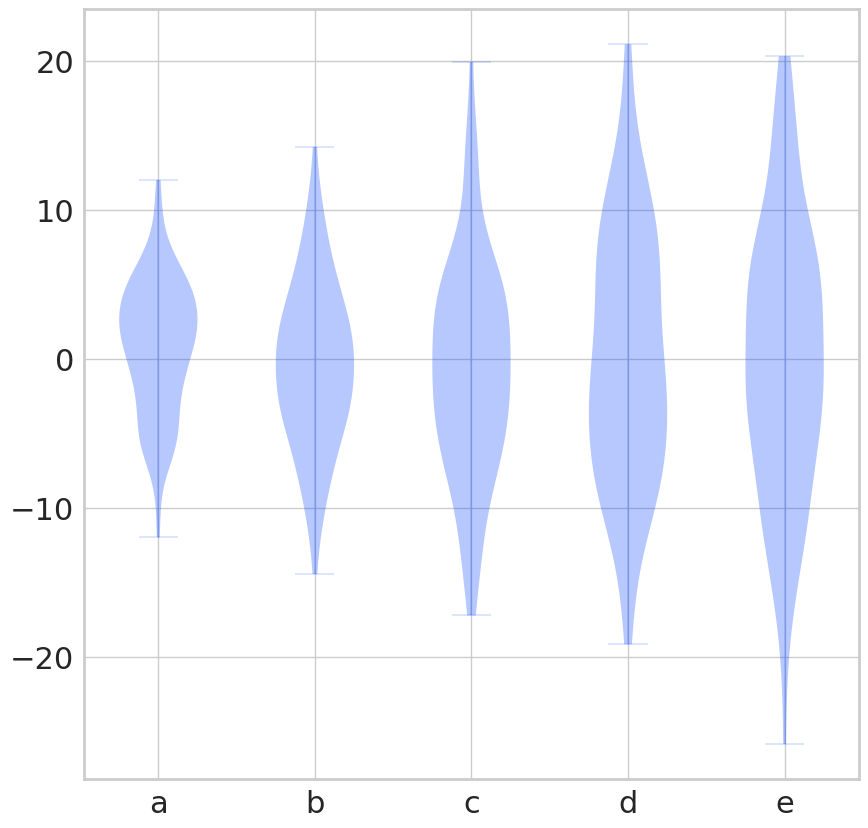

In [65]:
fp.fig

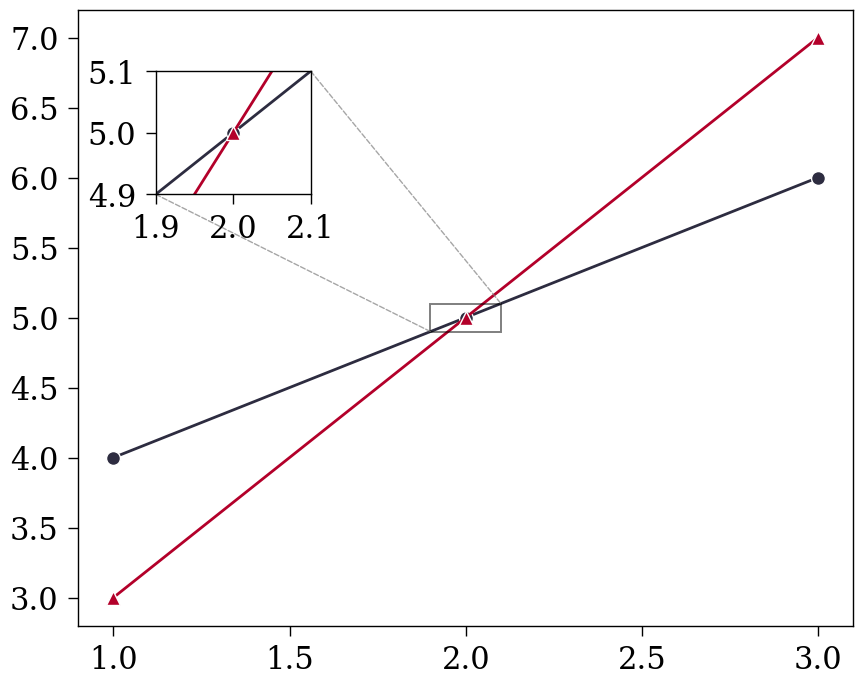

In [66]:
# inset zoom
fp = FreePlot((1, 1), (4, 5))

fp.lineplot([1, 2, 3], [4, 5, 6], label='a')
fp.lineplot([1, 2, 3], [3, 5, 7], label='b')
axins, patch, lines = fp.inset_axes( # use inset axes to add a zoomed subgraph
    xlims=(1.9, 2.1), # xlims and ylims determines 
    ylims=(4.9, 5.1), # the region to be zoomed
    bounds=(0.1, 0.7, 0.2, 0.2), # bounds: [x0, y0, width, height], x0, y0 is the location of lower left point;
    index=(0, 0),                # note that these values is according to the full ax, in [0, 1] actually.
    style='line'           # !!! this style should be the same style applied to original ax; for instance, the default style for lineplot
)                         # is 'line', so the style for inset_axes is 'line' as well.
fp.lineplot([1, 2, 3], [4, 5, 6], label='a', index=axins) # You must to plot again on axins (the insetted ax) to fill the artists.
fp.lineplot([1, 2, 3], [3, 5, 7], label='b', index=axins)